In [1]:
!pip install shap

  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


In [74]:
df=pd.read_csv('retail_price.csv')

In [75]:
df.tail()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000
675,bed5,bed_bath_table,01-09-2017,32,5222.36,24.324687,163.398710,56,162,5,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,199.509804


In [76]:
df.shape


(676, 30)

In [77]:
df.dtypes


product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

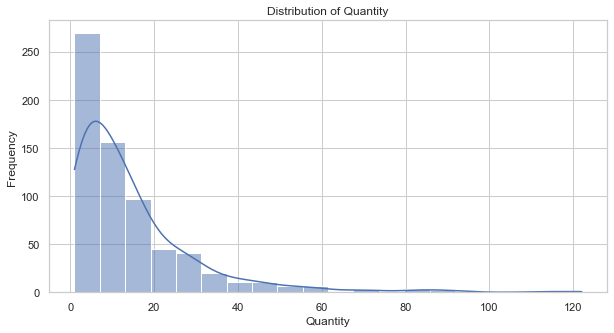

In [78]:


# Set a seaborn style
sns.set(style="whitegrid")

# 1. Histogram for 'qty'
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='qty', bins=20, kde=True)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()



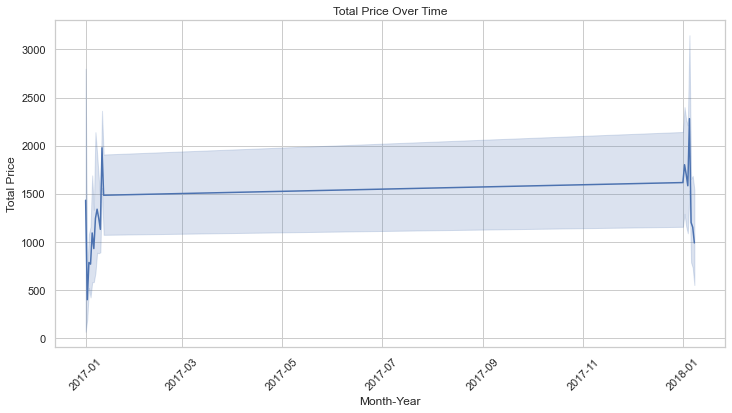

In [79]:
# 2. Time Series Plot for 'total_price'
df['month_year'] = pd.to_datetime(df['month_year'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month_year', y='total_price')
plt.xlabel('Month-Year')
plt.ylabel('Total Price')
plt.title('Total Price Over Time')
plt.xticks(rotation=45)
plt.show()



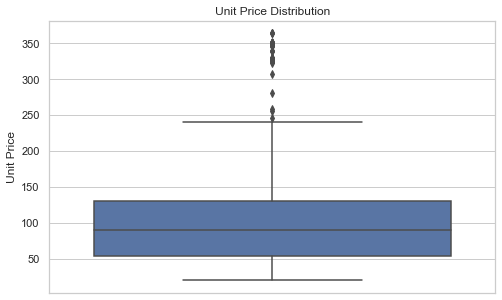

In [80]:
# 3. Box Plot for 'unit_price'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='unit_price')
plt.ylabel('Unit Price')
plt.title('Unit Price Distribution')
plt.show()



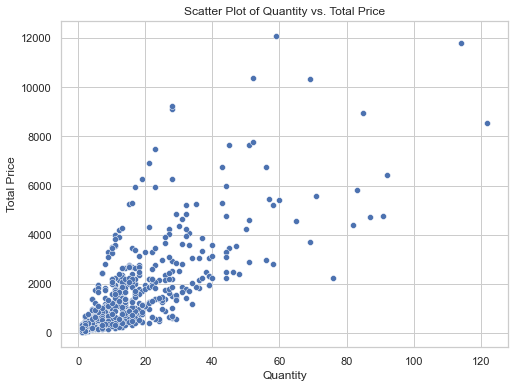

In [81]:
# 4. Scatter Plot for 'qty' vs. 'total_price'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='qty', y='total_price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.title('Scatter Plot of Quantity vs. Total Price')
plt.show()



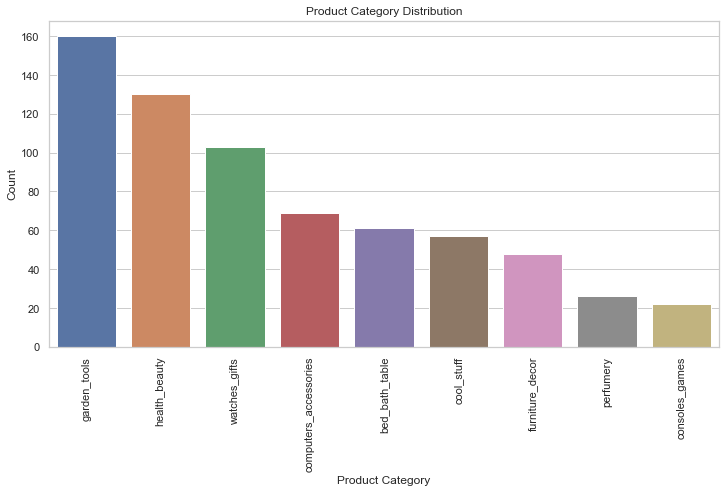

In [82]:
# 5. Bar Chart for 'product_category_name'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='product_category_name', order=df['product_category_name'].value_counts().index)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Product Category Distribution')
plt.xticks(rotation=90)
plt.show()


In [83]:
# Calculate basic statistics for numeric columns
numeric_stats = df.describe()

# Calculate median
median = df.median()

# Calculate variance
variance = df.var()

# Calculate skewness
skewness = df.skew()

# Calculate kurtosis
kurtosis = df.kurt()

# Calculate percentiles (e.g., 25th, 50th, 75th)
percentiles = df.quantile([0.25, 0.5, 0.75])

# Count unique values in categorical columns
categorical_counts = df['product_category_name'].value_counts()

# Print the results
print("Basic Statistics:")
print(numeric_stats)
print("\nMedian:")
print(median)
print("\nVariance:")
print(variance)
print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)
print("\nPercentiles:")
print(percentiles)
print("\nCategorical Value Counts:")
print(categorical_counts)


Basic Statistics:
              qty   total_price  freight_price  unit_price  \
count  676.000000    676.000000     676.000000  676.000000   
mean    14.495562   1422.708728      20.682270  106.496800   
std     15.443421   1700.123100      10.081817   76.182972   
min      1.000000     19.900000       0.000000   19.900000   
25%      4.000000    333.700000      14.761912   53.900000   
50%     10.000000    807.890000      17.518472   89.900000   
75%     18.000000   1887.322500      22.713558  129.990000   
max    122.000000  12095.000000      79.760000  364.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count           676.000000                  676.000000          676.000000   
mean             48.720414                  767.399408            1.994083   
std               9.420715                  655.205015            1.420473   
min              29.000000                  100.000000            1.000000   
25%              40.000000       

In [84]:
any(df.isna().sum() > 0)

False

In [85]:
fig = px.histogram(df,
                   x='total_price',
                   nbins=20,
                   title='Distribution of Total Price')
fig.show()

In [86]:
fig = px.box(df,
             y='unit_price',
             title='Distribution of Unit Price')
fig.show()

In [87]:
fig = px.scatter(df,
                 x='qty',
                 y='total_price', trendline='ols',
                 title='Quantity vs Total Price')
fig.show()

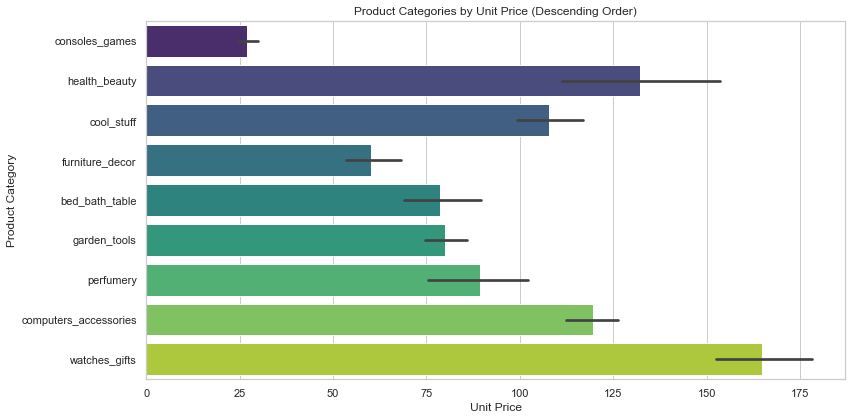

In [88]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Sort your DataFrame by 'unit_price' first
df_sorted = df.sort_values(by='unit_price')

# Create a bar plot with explicitly specified category order
sns.barplot(x='unit_price', y='product_category_name', data=df_sorted, palette='viridis')

plt.xlabel('Unit Price')
plt.ylabel('Product Category')
plt.title('Product Categories by Unit Price (Descending Order)')
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
fig = px.box(df, x='weekday', 
             y='total_price', 
             title='Box Plot of Total Price by number of Weekdays in a Month')
fig.show()

In [13]:
fig = px.box(df, x='weekend', 
             y='total_price', 
             title='Box Plot of Total Price by number of Weekend days in a Month')
fig.show()

In [14]:
df['comp1_diff'] = df['unit_price'] - df['comp_1']
df['comp2_diff'] = df['unit_price'] - df['comp_2']
df['comp3_diff'] = df['unit_price'] - df['comp_3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=df['product_category_name'],
                 y=df[comp],
                 title=f"Competitor {i} Price Difference per Unit",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()

In [15]:
df['fp1_diff'] = df['freight_price'] - df['fp1']
df['fp2_diff'] = df['freight_price'] - df['fp2']
df['fp3_diff'] = df['freight_price'] - df['fp3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=df['product_category_name'],
                 y=df[comp],
                 title=f"Competitor {i} Shipping Price Difference",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()

In [16]:
corrs = df.corr()['unit_price'].sort_values(ascending=False)
fig = px.bar(x=corrs.keys(), y=corrs.values,
             title='Correlation of Features with Unit Price',
             labels={
                 'x': 'Features',
                 'y': 'Correlation'
             })
fig.show()

In [17]:
monthly_df = df.groupby(by='month_year').agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'
}).reset_index()
monthly_df['month_year'] = pd.to_datetime(monthly_df['month_year'], format='%d-%m-%Y')
monthly_df = monthly_df.sort_values(by='month_year')

In [18]:
fig = px.scatter(monthly_df,
                 x='customers', y='total_price', trendline='ols',
                 title='Total Price vs Number of Customers')
fig.show()

In [19]:
fig = px.scatter(monthly_df,
             x='weekend', y='total_price', trendline='ols',
             title='Weekly Analysis of Total Price')
fig.show()

In [20]:
fig = px.bar(monthly_df,
             x='month_year', y='customers',
             title='Customers per month')
fig.show()

## Feature Engineering
Creating an aggregated dataframe by products
Since the data involves recurring products across months, we create an aggregated dataframe to proceed with the problem. This is because we will be using Regression Analysis. Some of the features get dropped based on the Correlation Analysis results. With the remaining -

Features like total_price, number of customers are aggregated by their sum
Others, such as competitor differences, product score, unit price, are all aggregated by thier mean

In [21]:
cols_to_mean = ['product_id', 'month_year', 'comp1_diff', 'comp2_diff', 'comp3_diff',
                'fp1_diff', 'fp2_diff', 'fp3_diff', 'product_score', 'unit_price']
cols_to_sum = ['product_id', 'month_year', 'total_price', 'freight_price', 'customers']
mean_df = df[cols_to_mean]
sum_df = df[cols_to_sum]

In [22]:
products_mean = mean_df.groupby(by='product_id').mean()
products_sum = sum_df.groupby(by='product_id').sum()

In [23]:
products = pd.concat([products_sum, products_mean],
                     axis=1, join='inner').reset_index()
products.head()

,product_id,total_price,freight_price,customers,comp1_diff,comp2_diff,comp3_diff,fp1_diff,fp2_diff,fp3_diff,product_score,unit_price
0,bed1,5831.77,240.410762,915,-43.976523,-47.634907,0.000000,-2.629416,-1.484667,0.000000,4.0,42.211989
1,bed2,42938.66,324.204152,968,0.000000,-28.547817,37.032861,0.000000,-0.989857,2.214245,3.9,86.774536
2,bed3,10304.96,172.316049,530,7.599892,0.000000,51.588471,-2.996105,0.000000,0.378738,3.3,92.101364
3,bed4,6011.77,151.576305,515,-38.826174,0.000000,6.085263,-3.644118,0.000000,-0.023987,4.2,46.725444
4,bed5,29997.36,96.015504,385,108.481703,0.000000,152.431703,3.761456,0.000000,4.750934,4.4,198.381703


In [24]:
X, y = products.drop(['product_id', 'unit_price'], axis=1), products['unit_price']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
LR_model.score(X_test,y_test)

ImportError: cannot import name 'precision' from 'sklearn.metrics' (C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)